In [44]:
import pandas as pd
import numpy as np
from PIL import Image

In [32]:
import sys
sys.path.append('/Users/damoncrockett/ivpy-test/src')
from ivpy import attach,show,montage,compose

In [3]:
df = pd.read_csv("/Users/damoncrockett/ivpy-datasets/ycba/metadata.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 8 columns):
Genre             19286 non-null object
Object name       20316 non-null object
Classification    31262 non-null object
medium            15628 non-null object
support           19007 non-null object
subjectConcept    16604 non-null object
datafile          31262 non-null object
imagefile         31262 non-null object
dtypes: object(8)
memory usage: 1.9+ MB


## Image resize

The images in this collection are very large, and we won't be needing to view them at that size, so it will pay off to create a resized set for the purposes of exploration here. It will take some time, but once it's done, all subsequent operations will be much faster.

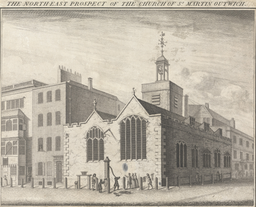

In [74]:
attach(df,'imagefile')
show(10,thumb=256)

For our purposes, this size should be sufficient.

In [59]:
import os
TARGET = "/Users/damoncrockett/ivpy-datasets/ycba/images-scaled/"
os.mkdir(TARGET)

So we've made a directory to save the resized images to. There are many ways to do the reading and writing here, but since we already have a column in our dataframe with image paths, we'll use that as a list of source images, and we'll create another column that will have paths to the resized images. We can use these columns in our resizing loop.

In [58]:
df['imagefile_scaled'] = [TARGET + os.path.basename(item) for item in df.imagefile]

In [61]:
for i in range(len(df)):
    if np.random.binomial(1,0.0005)==1:
        print i
    
    source = df.imagefile.loc[i]
    target = df.imagefile_scaled.loc[i]
    
    try:
        im = Image.open(source)
        im.thumbnail((256,256),Image.ANTIALIAS)
        im.save(target)
    except Exception as e:
        print e

1223
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/49080.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/20036.jpg'
2422
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/50049.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/39982.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/35831.jpg'
4445
4840
6501
7379
7608
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/29514.jpg'
8713
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/45961.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/33201.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/32309.jpg'
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/29098.jpg'
10937
cannot identify image file '/Users/damoncrockett/ivpy-datasets/ycba/images/18081.jpg'
11855
ca